<a href="https://colab.research.google.com/github/denisbebrovich/ML-DS/blob/main/%D0%9C%D0%9E%D0%B4%D0%B78other.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Библиотеки

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Файл

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/CarsReady.csv', delimiter = ',')
df

,mark,Box,Drive_unit,Engine,Year,Car_type,Car_class,Speed_to_100,Price
0,1.313174,0.299428,1.147307,-0.425027,1.065994,-0.249755,0.888917,0.103435,1.364551
1,-1.458154,-1.335813,-0.457201,-0.425027,0.048062,0.732403,-1.510956,1.629319,-1.172606
2,-0.143178,-1.335813,1.147307,-0.425027,1.065994,0.381721,0.888917,1.866835,-0.476531
3,-0.441660,0.299428,-0.457201,-0.425027,0.879700,0.732403,-0.994622,-0.063243,0.261010
4,-0.084953,0.299428,1.147307,-0.425027,0.361369,0.381721,0.888917,-0.431699,0.702425
...,...,...,...,...,...,...,...,...,...
19032,-1.804529,1.893584,-0.457201,-0.425027,0.700268,-1.409541,-0.994622,-0.063243,0.279962
19033,-1.538424,0.299428,1.147307,-0.425027,0.361369,0.732403,-0.501935,-1.474231,0.606667
19034,0.584074,-1.335813,-0.457201,-0.425027,-1.446256,0.732403,-0.501935,0.718880,-2.015781
19035,0.691144,0.299428,1.147307,-0.425027,1.667626,0.381721,0.888917,-1.517786,2.263972


#Обработка и модель
из [дз2](https://colab.research.google.com/drive/1eN_zIT-n-U6eux_kkbfc7QGee0evj1KN#scrollTo=EXyxnF9esgEU&uniqifier=2)

##Обработка

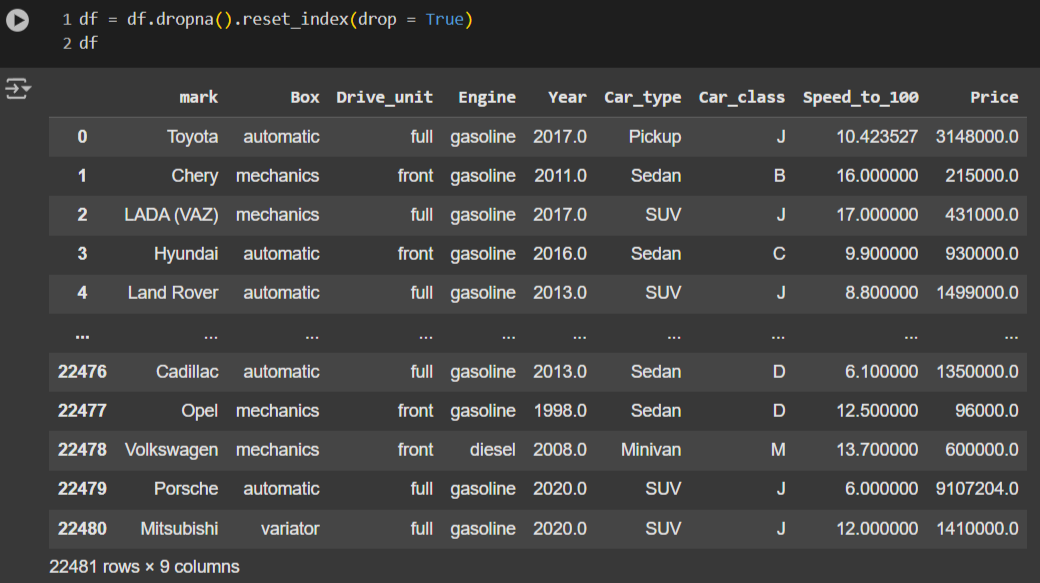

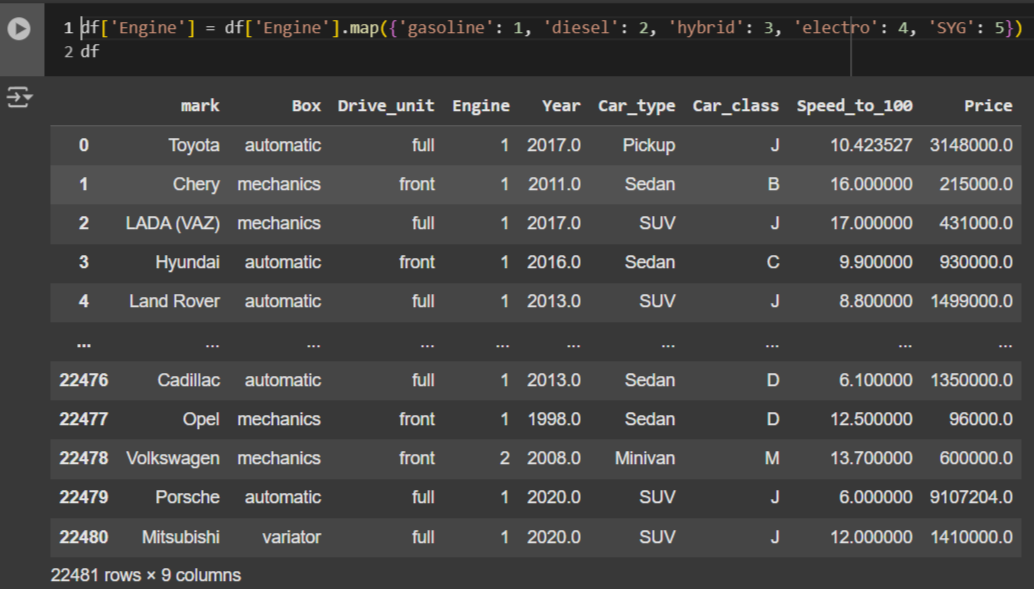

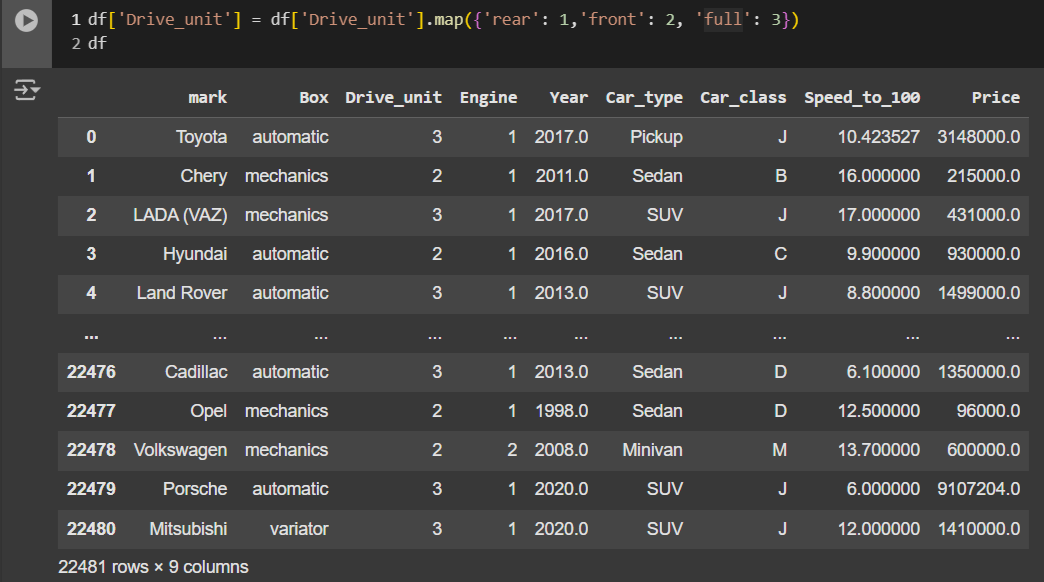

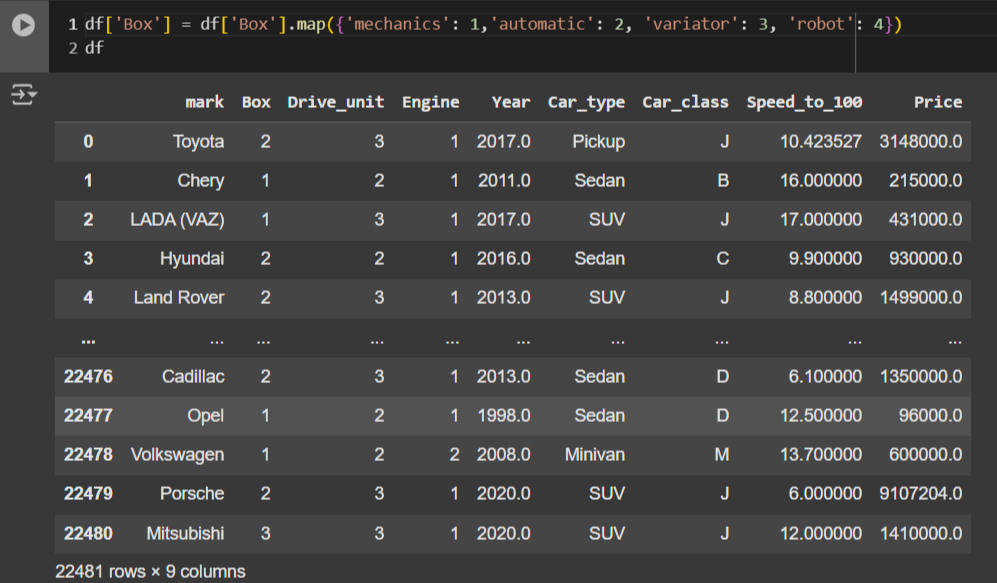

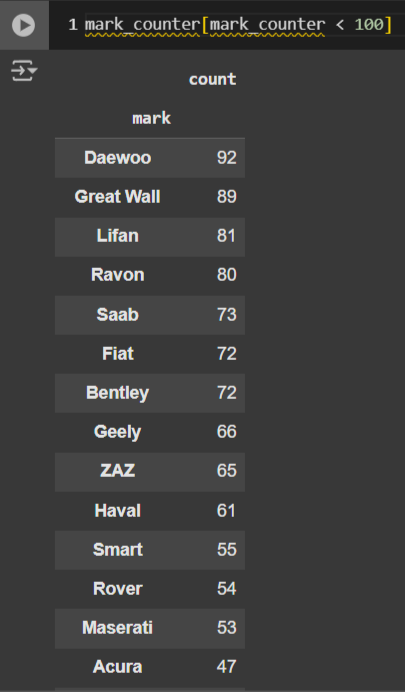

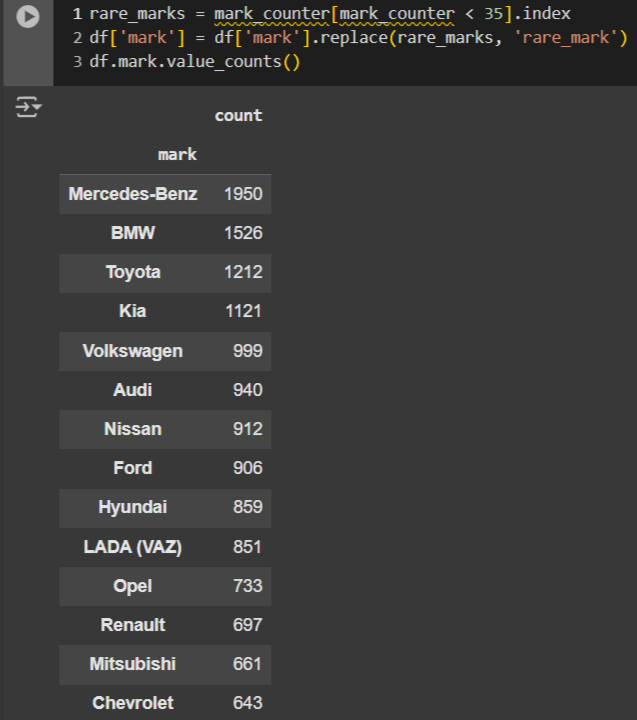

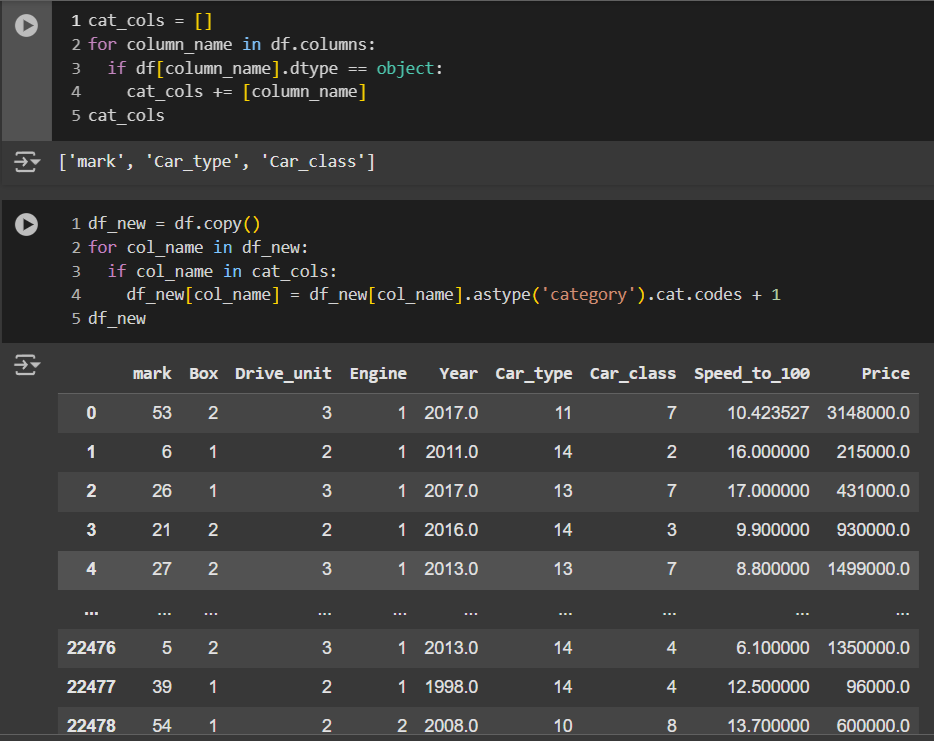

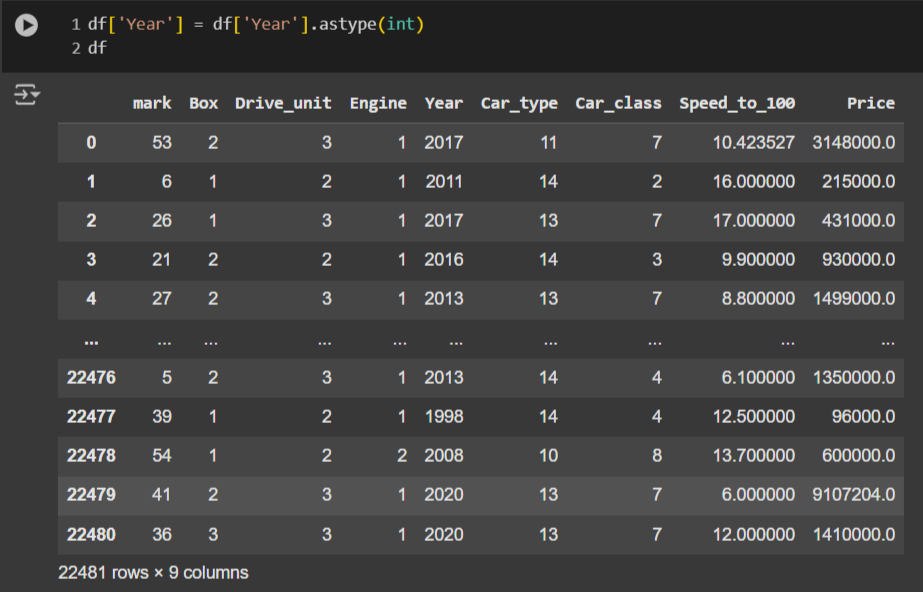

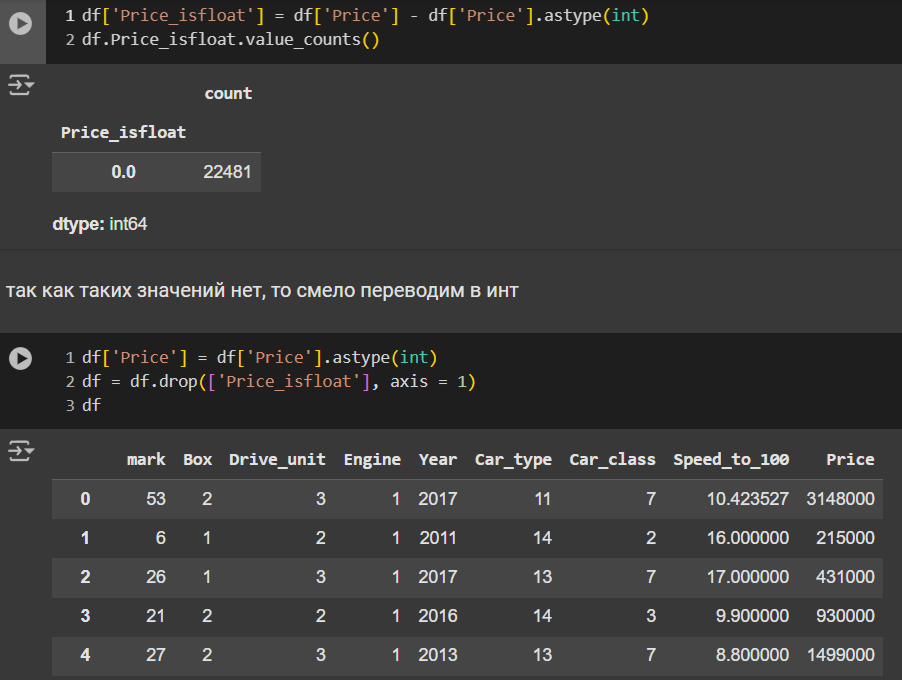

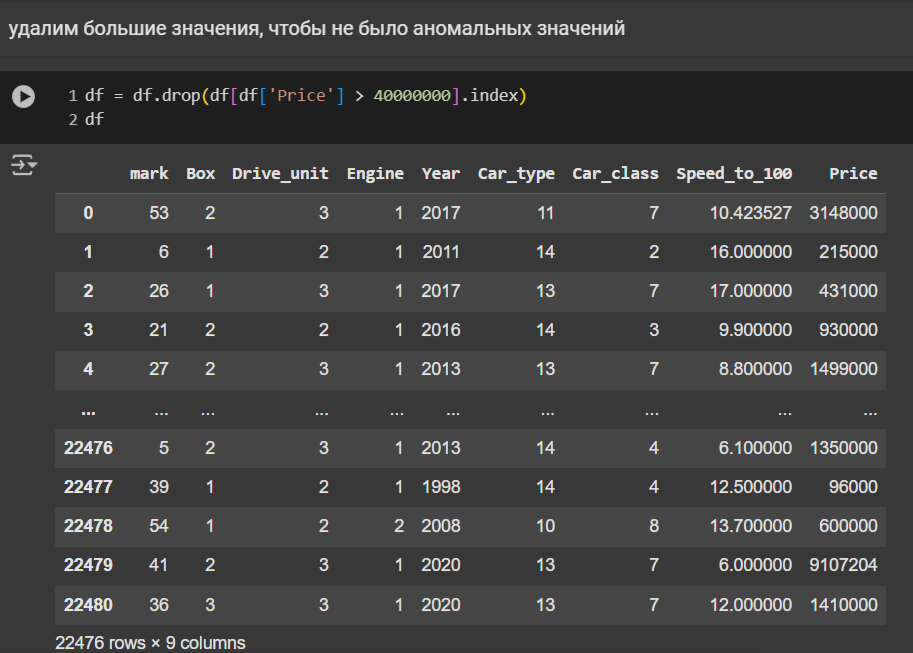

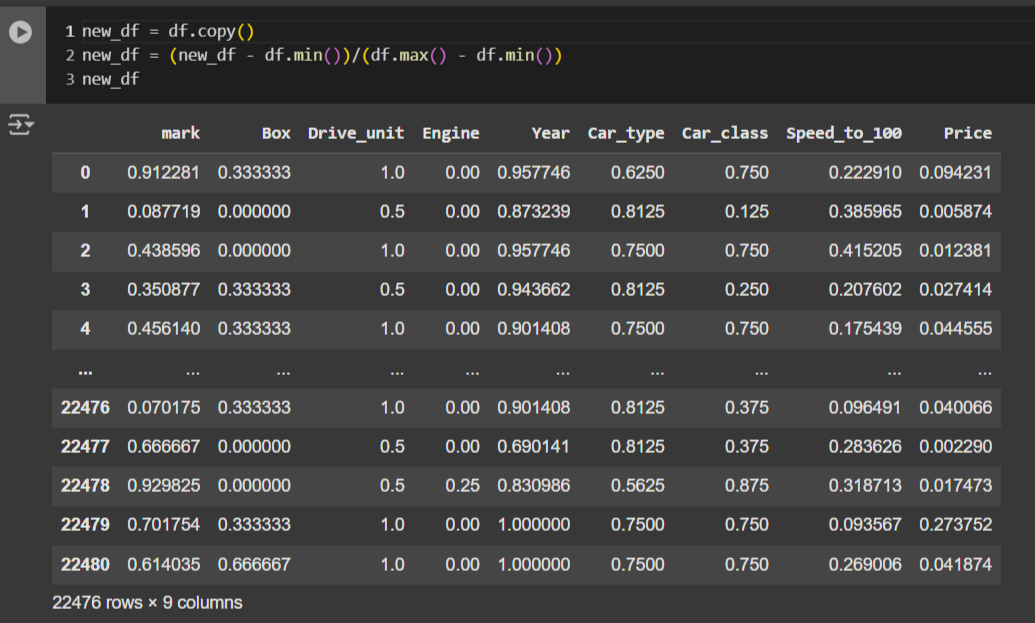

##базовая модель

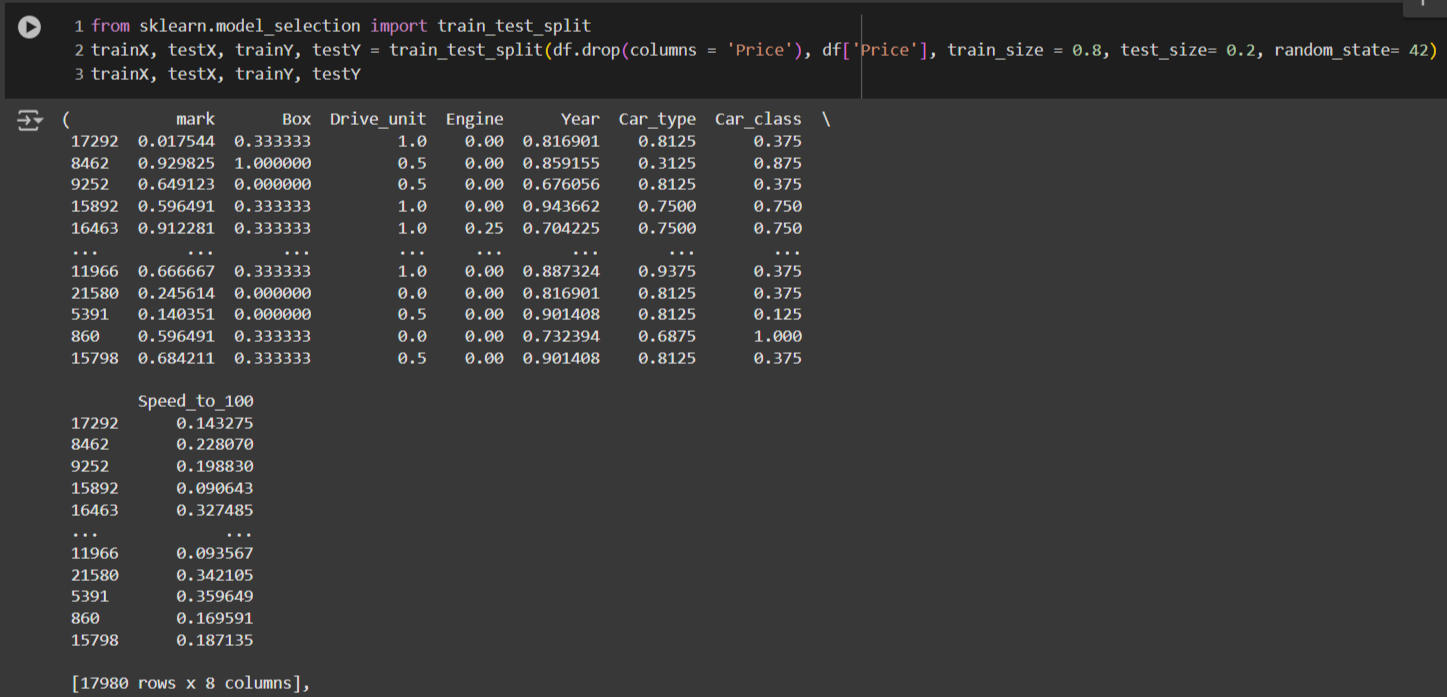

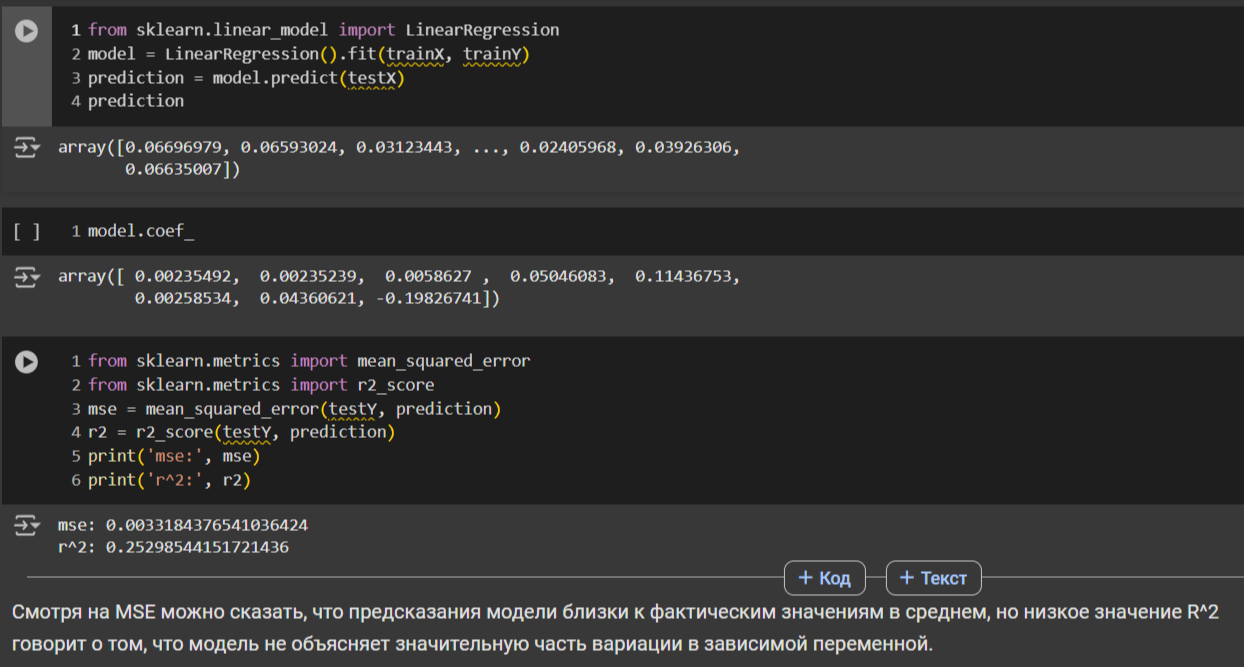

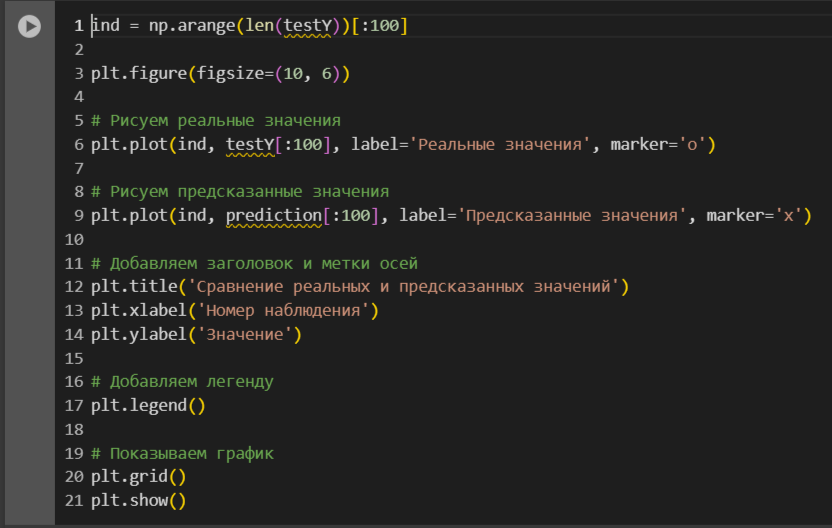

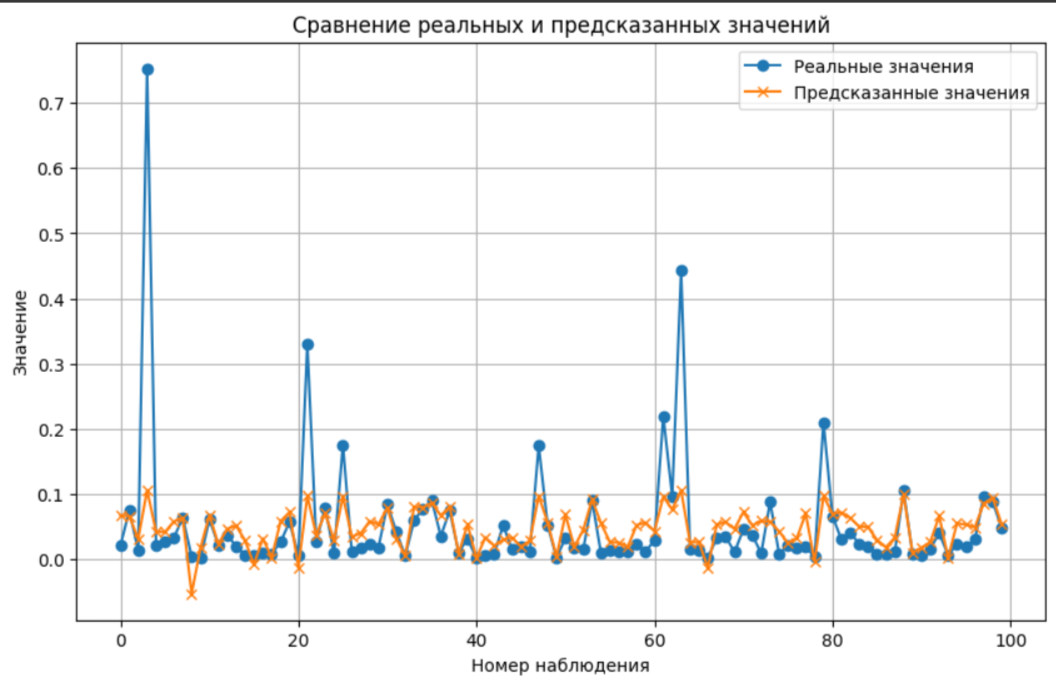

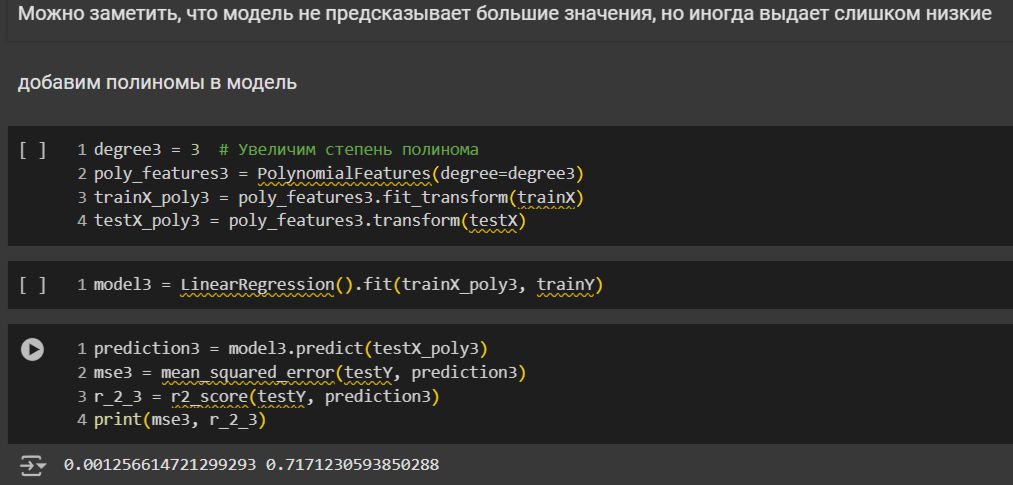

#Сложная модель

In [ ]:
trainX, testX, trainY, testY = train_test_split(df.drop(columns = 'Price'), df['Price'], train_size = 0.8, test_size= 0.2, random_state= 42)
trainX, testX, trainY, testY

(           mark       Box  Drive_unit    Engine      Year  Car_type  \
 2006   0.691144  0.299428    1.147307 -0.425027  1.459797  0.381721   
 1288   1.413884 -1.335813   -0.457201 -0.425027 -1.527567  1.502711   
 13657 -1.804529  1.893584    1.147307 -0.425027  0.201592  0.381721   
 17743  0.530121  1.236870    1.147307 -0.425027 -0.099373  0.381721   
 12339 -0.201862  0.299428   -0.457201 -0.425027  1.065994  0.732403   
 ...         ...       ...         ...       ...       ...       ...   
 11284  0.584074 -1.335813   -0.457201 -0.425027 -1.077094 -1.409541   
 11964 -1.380581  0.299428    1.147307 -0.425027  0.527543  0.381721   
 5390   1.313174  1.236870   -0.457201 -0.425027  0.361369 -1.409541   
 860    1.006220 -1.335813   -0.457201 -0.425027  1.667626 -1.226627   
 15795  0.797153 -1.335813   -0.457201 -0.425027  0.201592  0.732403   
 
        Car_class  Speed_to_100  
 2006    0.888917     -2.558092  
 1288   -0.501935     -0.294654  
 13657   0.888917     -0.791680 

In [ ]:
# обучение модели XGBoost для регрессии
xgb_reg = xgb.XGBRegressor(use_label_encoder=False, eval_metric='rmse')
xgb_reg.fit(trainX, trainY)

# предсказание и оценка модели XGBoost
pred = xgb_reg.predict(testX)
print("XGBoost Mean Squared Error:", mean_squared_error(testY, pred))
print("XGBoost R2 Score:", r2_score(testY, pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:58:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Mean Squared Error: 0.08684694699934954
XGBoost R2 Score: 0.910081749641777


#Улучшение

In [ ]:
# Получаем важность признаков
feature_importances = xgb_reg.feature_importances_

# Получаем индексы топовых признаков
n_top_features = 5
top_features = feature_importances.argsort()[::-1][:n_top_features]

# Получаем названия топовых признаков
top_features_names = [trainX.columns[i] for i in top_features]

# Обучаем модель XGBoost только на топовых признаках
X_train_top = trainX.loc[:, top_features_names]
X_test_top = testX.loc[:, top_features_names]
gboost_top = xgb.XGBRegressor(n_estimators=100, random_state=42)
gboost_top.fit(X_train_top, trainY)

# Оцениваем качество обучения обеих моделей
y_pred_top = gboost_top.predict(X_test_top)
print("Качество обучения модели на всех признаках:", mean_squared_error(testY, pred))
print("Качество обучения модели на топовых признаках:", mean_squared_error(testY, y_pred_top))

Качество обучения модели на всех признаках: 0.08684694699934954
Качество обучения модели на топовых признаках: 0.11794080743200519


выбор топ признаков не помогает

попробуем модель на таких данных

In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/ML/CarsNorm.csv', delimiter = ',')
df_new

,mark,Box,Drive_unit,Engine,Year,Car_type,Car_class,Speed_to_100,Price
0,53,2,3,1,2017,11,7,10.423527,3148000
1,6,1,2,1,2011,14,2,16.000000,215000
2,26,1,3,1,2017,13,7,17.000000,431000
3,21,2,2,1,2016,14,3,9.900000,930000
4,27,2,3,1,2013,13,7,8.800000,1499000
...,...,...,...,...,...,...,...,...,...
22471,5,2,3,1,2013,14,4,6.100000,1350000
22472,39,1,2,1,1998,14,4,12.500000,96000
22473,54,1,2,2,2008,10,8,13.700000,600000
22474,41,2,3,1,2020,13,7,6.000000,9107204


In [ ]:
df_new['Speed_to_100'] = df_new['Speed_to_100'].astype(int)

In [ ]:
trainX_new, testX_new, trainY_new, testY_new = train_test_split(df_new.drop(columns = 'Price'), df_new['Price'], train_size = 0.8, test_size= 0.2, random_state= 42)
trainX_new, testX_new, trainY_new, testY_new

(       mark  Box  Drive_unit  Engine  Year  Car_type  Car_class  Speed_to_100
 17288     2    2           3       1  2007        14          4             7
 8460     54    4           2       1  2010         6          8            10
 9250     38    1           2       1  1997        14          4             9
 15889    35    2           3       1  2016        13          7             5
 16460    53    2           3       2  1999        13          7            14
 ...     ...  ...         ...     ...   ...       ...        ...           ...
 11964    39    2           3       1  2012        16          4             6
 21575    15    1           1       1  2007        14          4            14
 5390      9    1           2       1  2013        14          2            15
 860      35    2           1       1  2001        12          9             8
 15795    40    2           2       1  2013        14          4             9
 
 [17980 rows x 8 columns],
        mark  Box  Driv

In [ ]:
# обучение модели XGBoost для регрессии
xgb_reg_new = xgb.XGBRegressor(use_label_encoder=False, eval_metric='rmse')
xgb_reg_new.fit(trainX_new, trainY_new)

# предсказание и оценка модели XGBoost
pred_new = xgb_reg.predict(testX_new)
print("XGBoost Mean Squared Error:", mean_squared_error(testY_new, pred_new))
print("XGBoost R2 Score:", r2_score(testY_new, pred_new))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:59:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Mean Squared Error: 6715586641920.0
XGBoost R2 Score: -0.371936559677124


In [ ]:
from sklearn.preprocessing import StandardScaler

# Создаем объект StandardScaler
scaler = StandardScaler()

# Стандартизируем данные
X_train_scaled = scaler.fit_transform(trainX_new)
X_test_scaled = scaler.transform(testX_new)

In [ ]:
# обучение модели XGBoost для регрессии
xgb_reg_st = xgb.XGBRegressor(use_label_encoder=False, eval_metric='rmse')
xgb_reg_st.fit(X_train_scaled, trainY_new)

# предсказание и оценка модели XGBoost
pred_st = xgb_reg_st.predict(X_test_scaled)
print("XGBoost Mean Squared Error:", mean_squared_error(testY_new, pred_st))
print("XGBoost R2 Score:", r2_score(testY_new, pred_st))

XGBoost Mean Squared Error: 376920997888.0
XGBoost R2 Score: 0.922998309135437


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:59:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


r2 конечно стал лучше но mse...

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Создаем объект MinMaxScaler
scaler = MinMaxScaler()

# Нормализуем данные
X_train_normalized = scaler.fit_transform(trainX_new)
X_test_normalized = scaler.transform(testX_new)

In [ ]:
# обучение модели XGBoost для регрессии
xgb_reg_normalized = xgb.XGBRegressor(use_label_encoder=False, eval_metric='rmse')
xgb_reg_normalized.fit(X_train_normalized, trainY_new)

# предсказание и оценка модели XGBoost
pred_normalized = xgb_reg_normalized.predict(X_test_normalized)
print("XGBoost Mean Squared Error:", mean_squared_error(testY_new, pred_normalized))
print("XGBoost R2 Score:", r2_score(testY_new, pred_normalized))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:59:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Mean Squared Error: 376920997888.0
XGBoost R2 Score: 0.922998309135437


тоже не помогло

В таком случае не знаю что еще можно попробовать для улучшения модели. может быть вы подкинете идеи и я что-то попробую хотя бы для себя.